# Individual Data Mining Assignment

# Introduction

### Contextualising the problem

**Data mining** is a field that focuses on extracting insights and patterns from large datasets. That as of itself already constitutes a strong argument in favour of using such a process when tackling business problems, but there is still more to it.



As such, this project proposes to answer the following problem statement and research questions:



### Expanding on the business objectives of the project (Business Understanding)



### Data Mining Methodology 

The Cross-Industry Standard Process for Data Mining (CRISP-DM) Methodology was used to build the deliverable of the assignment (it is pictured below). It organizes the data mining project in six phases (Business Understanding, Data Understanding, Data preparation, Modeling, Evaluation and Deployment).

<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/639px-CRISP-DM_Process_Diagram.png" alt="CRISP-DM Process" style="width:400px;height:400px;margin-top: 20px;">
</div>

Figure 2: CRISP-DM Process Diagram 

1. *Business Understanding*: This process involves 

2. *Data Understanding*: The dataset contains 

3. *Data Preparation*: This is the 

4. *Modelling*: In this phase 

5. *Evaluation*: The models will be evaluated based on the success criteria discussed in business objective i.e. 

6. *Deployment*: This step is omitted.

# Data Understanding

### Importing modules

In [95]:
%pip install -r requirements.txt -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: C:\Users\mikol\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [96]:
import pandas as pd
import seaborn as sns
import warnings
import numpy as np
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import xgboost as xgb
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.neural_network import MLPClassifier

# Set up the environment
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Constants
DATA_FOLDER = 'data'
RANDOM_STATE = 0

### Exploration of Arthritis variable

In [97]:
# Load the questionnaire dataset
questionnaire_df = pd.read_csv("./data/questionnaire.csv", encoding='ISO-8859-1')

# MCQ160A: Ever told you had arthritis
# MCQ195: What type of arthritis
filtered_questionnaire_df = questionnaire_df[questionnaire_df['MCQ160A'].notnull()]

merged_df = filtered_questionnaire_df

# Merge with other datasets
for csv_file in ['demographic.csv', 'labs.csv', 'questionnaire.csv']:
    if csv_file != 'questionnaire.csv':  # Skip the questionnaire file as it is already merged
        temp_df = pd.read_csv(f"./data/{csv_file}", encoding='ISO-8859-1')
        merged_df = pd.merge(merged_df, temp_df, on='SEQN', how='inner', suffixes=('', ''))

merged_df

SEQN  ACD011A  ACD011B  ACD011C  ACD040  ACD110  ALQ101  ALQ110  \
0     73557      1.0      NaN      NaN     NaN     NaN     1.0     NaN   
1     73558      1.0      NaN      NaN     NaN     NaN     1.0     NaN   
2     73559      1.0      NaN      NaN     NaN     NaN     1.0     NaN   
3     73561      1.0      NaN      NaN     NaN     NaN     1.0     NaN   
4     73562      NaN      NaN      NaN     4.0     NaN     1.0     NaN   
...     ...      ...      ...      ...     ...     ...     ...     ...   
5583  83723      NaN      NaN      NaN     4.0     NaN     1.0     NaN   
5584  83724      1.0      NaN      NaN     NaN     NaN     1.0     NaN   
5585  83726      NaN      NaN      NaN     1.0     NaN     NaN     NaN   
5586  83727      NaN      NaN      NaN     3.0     NaN     1.0     NaN   
5587  83729      1.0      NaN      NaN     NaN     NaN     NaN     NaN   

      ALQ120Q  ALQ120U  ALQ130  ALQ141Q  ALQ141U  ALQ151  ALQ160  BPQ020  \
0         1.0      3.0     1.0      0.0      NaN     1.0     NaN     1.0   
1         7.0      1.0     4.0      2.0      1.0     1.0     0.0     1.0   
2         0.0      NaN     NaN      NaN      NaN     2.0     NaN     1.0   
3         0.0      NaN     NaN      NaN      NaN     2.0     NaN     1.0   
4         5.0      3.0     1.0      0.0      NaN     2.0     0.0     1.0   
...       ...      ...     ...      ...      ...     ...     ...     ...   
5583      3.0      3.0     2.0      0.0      NaN     1.0     NaN     2.0   
5584      0.0      NaN     NaN      NaN      NaN     2.0     NaN     1.0   
5585      NaN      NaN     NaN      NaN      NaN     NaN     NaN     2.0   
5586      1.0      2.0     3.0      0.0      NaN     2.0     NaN     2.0   
5587      NaN      NaN     NaN      NaN      NaN     NaN     NaN     2.0   

      BPQ030  BPD035  BPQ040A  BPQ050A  BPQ056  BPD058  BPQ059  BPQ080  \
0        1.0    62.0      1.0      2.0     2.0     NaN     2.0     1.0   
1        1.0    53.0      2.0      NaN     1.0    52.0     2.0     1.0   
2        1.0    40.0      1.0      1.0     2.0     NaN     2.0     1.0   
3        2.0    55.0      1.0      1.0     1.0    12.0     2.0     2.0   
4        1.0    35.0      1.0      1.0     1.0   365.0     1.0     1.0   
...      ...     ...      ...      ...     ...     ...     ...     ...   
5583     NaN     NaN      NaN      NaN     2.0     NaN     2.0     2.0   
5584     1.0    60.0      1.0      1.0     1.0   156.0     2.0     1.0   
5585     NaN     NaN      NaN      NaN     2.0     NaN     2.0     2.0   
5586     NaN     NaN      NaN      NaN     2.0     NaN     2.0     2.0   
5587     NaN     NaN      NaN      NaN     2.0     NaN     2.0     2.0   

      BPQ060  BPQ070  BPQ090D  BPQ100D  CBD070  CBD090  CBD110  CBD120  \
0        NaN     1.0      1.0      1.0   300.0     0.0    50.0     0.0   
1        NaN     1.0      1.0      1.0   642.0   214.0   128.0    40.0   
2        NaN     1.0      1.0      1.0   150.0    25.0     0.0    40.0   
3        1.0     1.0      2.0      NaN   200.0     0.0    40.0     0.0   
4        NaN     2.0      1.0      1.0   150.0    60.0     0.0    60.0   
...      ...     ...      ...      ...     ...     ...     ...     ...   
5583     1.0     1.0      1.0      2.0   535.0     0.0   214.0    21.0   
5584     NaN     1.0      2.0      NaN   428.0     0.0     0.0   240.0   
5585     1.0     3.0      2.0      NaN   557.0    85.0    42.0   428.0   
5586     1.0     3.0      2.0      NaN   700.0     0.0     0.0   800.0   
5587     1.0     1.0      2.0      NaN   200.0     0.0     0.0    45.0   

      CBD130  HSD010  HSQ500  HSQ510  HSQ520  HSQ571  HSQ580  HSQ590  HSAQUEX  \
0       85.0     2.0     2.0     2.0     2.0     2.0     NaN     2.0      2.0   
1       20.0     4.0     2.0     2.0     2.0     2.0     NaN     2.0      2.0   
2        0.0     3.0     2.0     2.0     2.0     2.0     NaN     2.0      2.0   
3        0.0     5.0     2.0     2.0     2.0     2.0     NaN     2.0      2.0   
4        0.0     5.0  

In [98]:
# Load the variable descriptions
variable_descriptions = pd.read_excel('./variable_description.xlsx')
variable_descriptions['Variable Name'] = variable_descriptions['Variable Name'].str.upper()

# Filter descriptions for columns present in the dataframe
descriptions = variable_descriptions[variable_descriptions['Variable Name'].isin(merged_df.columns)]

# Identify columns without descriptions
no_explanation = set(merged_df.columns) - set(descriptions['Variable Name'])

# Make a dictionary of descriptions
descriptions = descriptions.set_index('Variable Name')['Variable Description'].to_dict()

print(descriptions)

{'SEQN': 'Respondent sequence number', 'RIDSTATR': 'Interview and examination status of the participant.', 'RIAGENDR': 'Gender of the participant.', 'RIDAGEYR': 'Age in years of the participant at the time of screening. Individuals 80 and over are topcoded at 80 years of age.', 'RIDAGEMN': 'Age in months of the participant at the time of screening. Individuals aged 959 months and older are topcoded at 959 months.', 'RIDRETH1': 'Recode of reported race and Hispanic origin information', 'DMDCITZN': '{Are you/Is SP} a citizen of the United States? [Information about citizenship is being collected by the U.S. Public Health Service to perform health related research. Providing this information is voluntary and is collected under the authority of the Public Health Service Act. There will be no effect on pending immigration or citizenship petitions.]', 'DMDYRSUS': 'Length of time the participant has been in the US.', 'DMDEDUC3': 'What is the highest grade or level of school {you have/SP has} 

In [99]:
for col in merged_df.columns:
    print(f"{col}: {descriptions.get(col, 'No description')}")

SEQN: Respondent sequence number
ACD011A: What language(s) {do you/does SP} usually speak at home?
ACD011B: What language(s) {do you/does SP} usually speak at home?
ACD011C: What language(s) {do you/does SP} usually speak at home?
ACD040: Now I'm going to ask you about language use. What language(s) {do you/does SP} usually speak at home? {Do you/Does he/Does she} speak only Spanish, more Spanish than English, both equally, more English than Spanish, or only English?
ACD110: {Do you/Does SP} speak only (NON-ENGLISH LANGUAGE), more (NON-ENGLISH LANGUAGE) than English, both equally, more English than (NON-ENGLISH LANGUAGE), or only English?
ALQ101: The next questions are about drinking alcoholic beverages. Included are liquor (such as whiskey or gin), beer, wine, wine coolers, and any other type of alcoholic beverage.In any one year, {have you/has SP} had at least 12 drinks of any type of alcoholic beverage? By a drink, I mean a 12 oz. beer, a 5 oz. glass of wine, or one and half ounces 

In [100]:
print("Columns without descriptions:")
print(no_explanation)

Columns without descriptions:
{'LBDR89.y', 'LBDRPI.x', 'WTSH2YR.x', 'LBDR40.x', 'LBDR26.x', 'LBDR53.y', 'LBDRHP.x', 'LBDRHP.y', 'LBDR62.x', 'LBDR39.y', 'LBDR35.y', 'LBDR59.x', 'LBDR31.y', 'LBDR73.y', 'LBDR16.y', 'LBDR69.x', 'SMAQUEX.x', 'WTSB2YR.x', 'LBDR72.x', 'LBDR11.y', 'LBDR54.x', 'LBDR62.y', 'LBDR53.x', 'LBDR18.y', 'LBDR45.x', 'LBDR64.x', 'LBDR26.y', 'LBDR16.x', 'WTSAF2YR.y', 'LBDR69.y', 'LBDR84.y', 'LBDR18.x', 'PHAFSTMN.y', 'LBDR66.x', 'LBDRPI.y', 'LBDR55.x', 'LBDR81.x', 'URXUCR.x', 'LBDR66.y', 'LBDR52.x', 'LBDR83.x', 'LBDR61.y', 'LBDR70.x', 'WTSAF2YR.x', 'LBDR89.x', 'LBDRLP.y', 'LBDR51.x', 'WTSH2YR.y', 'LBDR33.x', 'LBDR71.x', 'LBDR33.y', 'LBDR73.x', 'LBDR06.x', 'LBDR71.y', 'LBDR72.y', 'LBDR31.x', 'LBDR67.y', 'LBDR61.x', 'WTSA2YR.x', 'LBDR56.y', 'LBDR55.y', 'URXUCR.y', 'LBDR68.x', 'LBXAPB', 'LBDR56.x', 'LBDR70.y', 'PHAFSTHR.x', 'LBDR06.y', 'WTSB2YR.y', 'LBDAPBSI', 'LBDR82.x', 'LBDR51.y', 'LBDR42.y', 'LBDR59.y', 'LBDR58.y', 'PHAFSTHR.y', 'SMAQUEX.y', 'LBDR11.x', 'LBDR82.y', 'PHAFS

In [101]:
# Drop the columns without descriptions
merged_df = merged_df.drop(columns=no_explanation)
merged_df.head(4)

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,ALQ130,ALQ141Q,ALQ141U,ALQ151,ALQ160,BPQ020,BPQ030,BPD035,BPQ040A,BPQ050A,BPQ056,BPD058,BPQ059,BPQ080,BPQ060,BPQ070,BPQ090D,BPQ100D,CBD070,CBD090,CBD110,CBD120,CBD130,HSD010,HSQ500,HSQ510,HSQ520,HSQ571,HSQ580,HSQ590,HSAQUEX,CSQ010,CSQ020,CSQ030,CSQ040,CSQ060,CSQ070,CSQ080,CSQ090A,CSQ090B,CSQ090C,CSQ090D,CSQ100,CSQ110,CSQ120A,CSQ120B,CSQ120C,CSQ120D,CSQ120E,CSQ120F,CSQ120G,CSQ120H,CSQ140,CSQ160,CSQ170,CSQ180,CSQ190,CSQ200,CSQ202,CSQ204,CSQ210,CSQ220,CSQ240,CSQ250,CSQ260,AUQ136,AUQ138,CDQ001,CDQ002,CDQ003,CDQ004,CDQ005,CDQ006,CDQ009A,CDQ009B,CDQ009C,CDQ009D,CDQ009E,CDQ009F,CDQ009G,CDQ009H,CDQ008,CDQ010,DIQ010,DID040,DIQ160,DIQ170,DIQ172,DIQ175A,DIQ175B,DIQ175C,DIQ175D,DIQ175E,DIQ175F,DIQ175G,DIQ175H,DIQ175I,DIQ175J,DIQ175K,DIQ175L,DIQ175M,DIQ175N,DIQ175O,DIQ175P,DIQ175Q,DIQ175R,DIQ175S,DIQ175T,DIQ175U,DIQ175V,DIQ175W,DIQ175X,DIQ180,DIQ050,DID060,DIQ060U,DIQ070,DIQ230,DIQ240,DID250,DID260,DIQ260U,DIQ275,DIQ280,DIQ291,DIQ300S,DIQ300D,DID310S,DID310D,DID320,DID330,DID341,DID350,DIQ350U,DIQ360,DIQ080,DBQ010,DBD030,DBD041,DBD050,DBD055,DBD061,DBQ073A,DBQ073B,DBQ073C,DBQ073D,DBQ073E,DBQ073U,DBQ700,DBQ197,DBQ223A,DBQ223B,DBQ223C,DBQ223D,DBQ223E,DBQ223U,DBQ229,DBQ235A,DBQ235B,DBQ235C,DBQ301,DBQ330,DBQ360,DBQ370,DBD381,DBQ390,DBQ400,DBD411,DBQ421,DBQ424,DBD895,DBD900,DBD905,DBD910,CBQ596,CBQ606,CBQ611,CBQ505,CBQ535,CBQ540,CBQ545,CBQ550,CBQ552,CBQ580,CBQ585,CBQ590,DED031,DEQ034A,DEQ034C,DEQ034D,DEQ038G,DEQ038Q,DED120,DED125,DLQ010,DLQ020,DLQ040,DLQ050,DLQ060,DLQ080,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100,DUQ200,DUQ210,DUQ211,DUQ213,DUQ215Q,DUQ215U,DUQ217,DUQ219,DUQ220Q,DUQ220U,DUQ230,DUQ240,DUQ250,DUQ260,DUQ270Q,DUQ270U,DUQ272,DUQ280,DUQ290,DUQ300,DUQ310Q,DUQ310U,DUQ320,DUQ330,DUQ340,DUQ350Q,DUQ350U,DUQ352,DUQ360,DUQ370,DUQ380A,DUQ380B,DUQ380C,DUQ380D,DUQ380E,DUQ390,DUQ400Q,DUQ400U,DUQ410,DUQ420,DUQ430,ECD010,ECQ020,ECD070A,ECD070B,ECQ080,ECQ090,WHQ030E,MCQ080E,ECQ150,FSD032A,FSD032B,FSD032C,FSD041,FSD052,FSD061,FSD071,FSD081,FSD092,FSD102,FSD032D,FSD032E,FSD032F,FSD111,FSD122,FSD132,FSD141,FSD146,FSDHH,FSDAD,FSDCH,FSD151,FSQ165,FSQ012,FSD012N,FSD230,FSD225,FSQ235,FSQ162,FSD650ZC,FSD660ZC,FSD675,FSD680,FSD670ZC,FSQ690,FSQ695,FSD650ZW,FSD660ZW,FSD670ZW,HEQ010,HEQ020,HEQ030,HEQ040,HIQ011,HIQ031A,HIQ031B,HIQ031C,HIQ031D,HIQ031E,HIQ031F,HIQ031G,HIQ031H,HIQ031I,HIQ031J,HIQ031AA,HIQ260,HIQ105,HIQ270,HIQ210,HOD050,HOQ065,HUQ010,HUQ020,HUQ030,HUQ041,HUQ051,HUQ061,HUQ071,HUD080,HUQ090,IMQ011,IMQ020,IMQ040,IMQ070,IMQ080,IMQ090,IMQ045,INQ020,INQ012,INQ030,INQ060,INQ080,INQ090,INQ132,INQ140,INQ150,IND235,INDFMMPI,INDFMMPC,INQ244,IND247,MCQ010,MCQ025,MCQ035,MCQ040,MCQ050,AGQ030,MCQ053,MCQ070,MCQ075,MCQ080,MCQ082,MCQ084,MCQ086,MCQ092,MCD093,MCQ149,MCQ151,MCQ160A,MCQ180A,MCQ195,MCQ160N,MCQ180N,MCQ160B,MCQ180B,MCQ160C,MCQ180C,MCQ160D,MCQ180D,MCQ160E,MCQ180E,MCQ160F,MCQ180F,MCQ160G,MCQ180G,MCQ160M,MCQ170M,MCQ180M,MCQ160K,MCQ170K,MCQ180K,MCQ160L,MCQ170L,MCQ180L,MCQ160O,MCQ203,MCQ206,MCQ220,MCQ230A,MCQ230B,MCQ230C,MCQ230D,MCQ240A,MCQ240AA,MCQ240B,MCQ240BB,MCQ240C,MCQ240CC,MCQ240D,MCQ240DD,MCQ240DK,MCQ240E,MCQ240F,MCQ240G,MCQ240H,MCQ240I,MCQ240J,MCQ240K,MCQ240L,MCQ240M,MCQ240N,MCQ240O,MCQ240P,MCQ240Q,MCQ240R,MCQ240S,MCQ240T,MCQ240U,MCQ240V,MCQ240W,MCQ240X,MCQ240Y,MCQ240Z,MCQ300A,MCQ300B,MCQ300C,MCQ365A,MCQ365B,MCQ365C,MCQ365D,MCQ370A,MCQ370B,MCQ370C,MCQ370D,MCQ380,OCD150,OCQ180,OCQ210,OCQ260,OCD270,OCQ380,OCD390G,OCD395,OHQ030,OHQ033,OHQ770,OHQ780A,OHQ780B,OHQ780C,OHQ780D,OHQ780E,OHQ780F,OHQ780G,OHQ780H,OHQ780I,OHQ780J,OHQ780K,OHQ555G,OHQ555Q,OHQ555U,OHQ560G,OHQ560Q,OHQ560U,OHQ565,OHQ570Q,OHQ570U,OHQ575G,OHQ575Q,OHQ575U,OHQ580,OHQ585Q,OHQ585U,OHQ590G,OHQ590Q,OHQ590U,OHQ610,OHQ612,OHQ614,OHQ620,OHQ640,OHQ680,OHQ835,OHQ845,OHQ848G,OHQ848Q,OHQ849,OHQ850,OHQ855,OHQ860,OHQ865,OHQ870,OHQ875,OHQ880,OHQ885,OHQ895,OHQ900,OSQ010A,OSQ010B,OSQ010C,OSQ020A,OSQ020B,OSQ020C,OSD030AA,OSQ040AA,OSD050AA,OSD030AB,OSQ040AB,OSD050AB,OSD030AC,OSQ040AC,OSD050AC,OSD030BA,OSQ040BA

In [102]:
mapping = {
    # Mostly based on: https://www.cdc.gov/arthritis/risk-factors/index.html
    # Target
    # "MCQ160A": "ever_diagnosed_with_arthritis",  # Direct indicator of arthritis diagnosis.
    "MCQ195": "type_of_arthritis",  # Identifies specific arthritis type for targeted analysis.

    # Demographics
    "RIAGENDR": "gender", # Person's gender
    "RIDAGEYR": "age", # Person's age in years
    "INDHHIN2": "annual_household_income",  # Household income can impact arthritis risk and management.
    
    # General Health
    "HSD010": "general_health_status",  # Overall health perception, which can influence arthritis outcomes.
    "OSQ080": "broke_bone_after_20",  # Bone fractures can impact arthritis risk and severity.

    # Weight and Obesity
    "MCQ080": "ever_diagnosed_as_overweight",  # Clinical diagnosis of overweight status, a known risk factor for arthritis.

    # Physical Activity and Mobility
    "DLQ050": "difficulty_walking_or_climbing_stairs",  # Assesses mobility limitations often associated with arthritis.
    "DLQ060": "difficulty_dressing_or_bathing",  # Evaluates daily living challenges faced by arthritis patients.
    "DMQMILIZ": "served_in_military",  # Military service can impact arthritis risk due to physical demands and injuries.

    # Smoking
    "SMQ020": "smoked_100_cigarettes_lifetime",  # Smoking is a modifiable risk factor linked to arthritis development and progression.

    # Medical Conditions
    "BPQ020": "ever_diagnosed_with_hypertension",  # Hypertension is associated with systemic inflammation, impacting arthritis.
    "BPQ080": "ever_diagnosed_with_high_cholesterol",  # Dyslipidemia can contribute to systemic inflammation.
    "DIQ010": "ever_diagnosed_with_diabetes",  # Diabetes is linked to inflammation and joint health.
    "MCQ070": "ever_diagnosed_with_psoriasis",  # Psoriasis is related to psoriatic arthritis.
    "MCQ082": "ever_diagnosed_with_celiac_disease",  # Celiac disease can have joint-related manifestations.

    # # Symptoms and Quality of Life
    # "DPQ040": "feeling_tired_frequency_last_2_weeks",  # Fatigue is a common symptom in arthritis patients.
    # "DPQ050": "poor_appetite_or_overeating_last_2_weeks",  # Appetite changes can affect weight and inflammation levels.

    # Healthcare Utilization and Access
    "HUQ051": "doctor_visits_last_12_months",  # Frequency of healthcare visits may reflect disease severity or management.
    "HUQ071": "hospitalization_overnight_last_12_months",  # Indicates severe health episodes possibly related to arthritis complications.
}

In [103]:
# Filter merged_df to only include columns in mapping, then rename them using the mapping dictionary
df = merged_df[list(mapping.keys())].rename(columns=mapping)

We can look at the descriptive statistics of the dataframe below:

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5588 entries, 0 to 5587
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   type_of_arthritis                         1467 non-null   float64
 1   gender                                    5588 non-null   int64  
 2   age                                       5588 non-null   int64  
 3   annual_household_income                   5513 non-null   float64
 4   general_health_status                     5124 non-null   float64
 5   broke_bone_after_20                       3708 non-null   float64
 6   ever_diagnosed_as_overweight              5588 non-null   float64
 7   difficulty_walking_or_climbing_stairs     5588 non-null   float64
 8   difficulty_dressing_or_bathing            5588 non-null   float64
 9   served_in_military                        5588 non-null   float64
 10  smoked_100_cigarettes_lifetime      

In [105]:
print("Missing data in the dataframe:")
print(df.isnull().sum())

Missing data in the dataframe:
type_of_arthritis                           4121
gender                                         0
age                                            0
annual_household_income                       75
general_health_status                        464
broke_bone_after_20                         1880
ever_diagnosed_as_overweight                   0
difficulty_walking_or_climbing_stairs          0
difficulty_dressing_or_bathing                 0
served_in_military                             0
smoked_100_cigarettes_lifetime                 0
ever_diagnosed_with_hypertension               0
ever_diagnosed_with_high_cholesterol           0
ever_diagnosed_with_diabetes                   0
ever_diagnosed_with_psoriasis                  0
ever_diagnosed_with_celiac_disease             0
doctor_visits_last_12_months                   0
hospitalization_overnight_last_12_months       0
dtype: int64


In [106]:
# # If they didnt have arthritis, we can fill the type of arthritis with 0
df['type_of_arthritis'].fillna(0, inplace=True)
# If they didnt break a bone after 20, we can fill the type of arthritis with 0
df['broke_bone_after_20'].fillna(0, inplace=True)

In [107]:
# Drop NAs
df = df.dropna()

### Plotting of numericals

As can be seen from the line below, there are not many continuous variables.

In [108]:
continuous_columns = ['age']
categorical_columns = df.columns.difference(continuous_columns)

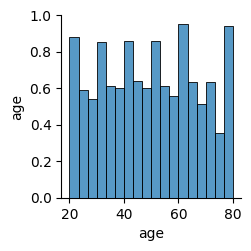

In [109]:
# Numerical Pairplot according to response variable
sns.pairplot(df[continuous_columns], plot_kws={'alpha':0.1})
plt.show()

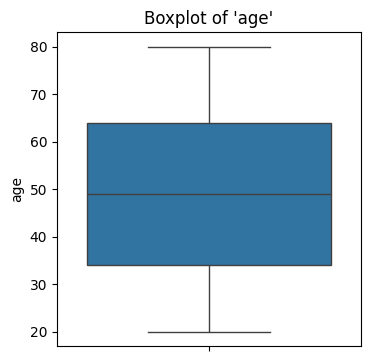

In [110]:
def create_boxplots(df, columns, rows=2, cols=2):
    fig, axes = plt.subplots(rows, cols, figsize=(7, 7))
    axes = axes.flatten()  

    for i, column in enumerate(columns):
        sns.boxplot(data=df, y=column, ax=axes[i])
        axes[i].set_title(f"Boxplot of '{column}'")

    # Remove any empty subplots if there are fewer columns than grid spaces
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

create_boxplots(df, continuous_columns)

## Target Variable Name: type_of_arthritis

**English Text:** Which type of arthritis was it?  
**Target:** Both males and females 20 YEARS - 150 YEARS  

| Code or Value | Value Description                       | 
|---------------|-----------------------------------------|
| 1             | Osteoarthritis or degenerative arthritis|
| 2             | Rheumatoid arthritis                    | 
| 3             | Psoriatic arthritis                     | 
| 4             | Other                                   | 
| 7             | Refused                                 | 
| 9             | Don’t know                              | 
| 0             | Missing                                 | 


In [111]:
df = df[~df['type_of_arthritis'].isin([4, 7, 9, 0])]
df.reset_index(drop=True, inplace=True)
df

,type_of_arthritis,gender,age,annual_household_income,general_health_status,broke_bone_after_20,ever_diagnosed_as_overweight,difficulty_walking_or_climbing_stairs,difficulty_dressing_or_bathing,served_in_military,smoked_100_cigarettes_lifetime,ever_diagnosed_with_hypertension,ever_diagnosed_with_high_cholesterol,ever_diagnosed_with_diabetes,ever_diagnosed_with_psoriasis,ever_diagnosed_with_celiac_disease,doctor_visits_last_12_months,hospitalization_overnight_last_12_months
0,2.0,1,56,9.0,5.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,3,1
1,2.0,2,61,10.0,3.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2,2
2,2.0,2,56,4.0,3.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,4,2
3,1.0,2,65,3.0,4.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,6,1
4,1.0,2,62,15.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1.0,2,80,8.0,3.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,7,2
874,1.0,1,40,15.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2
875,1.0,1,68,4.0,4.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,8,2
876,2.0,2,80,7.0,3.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,5,1


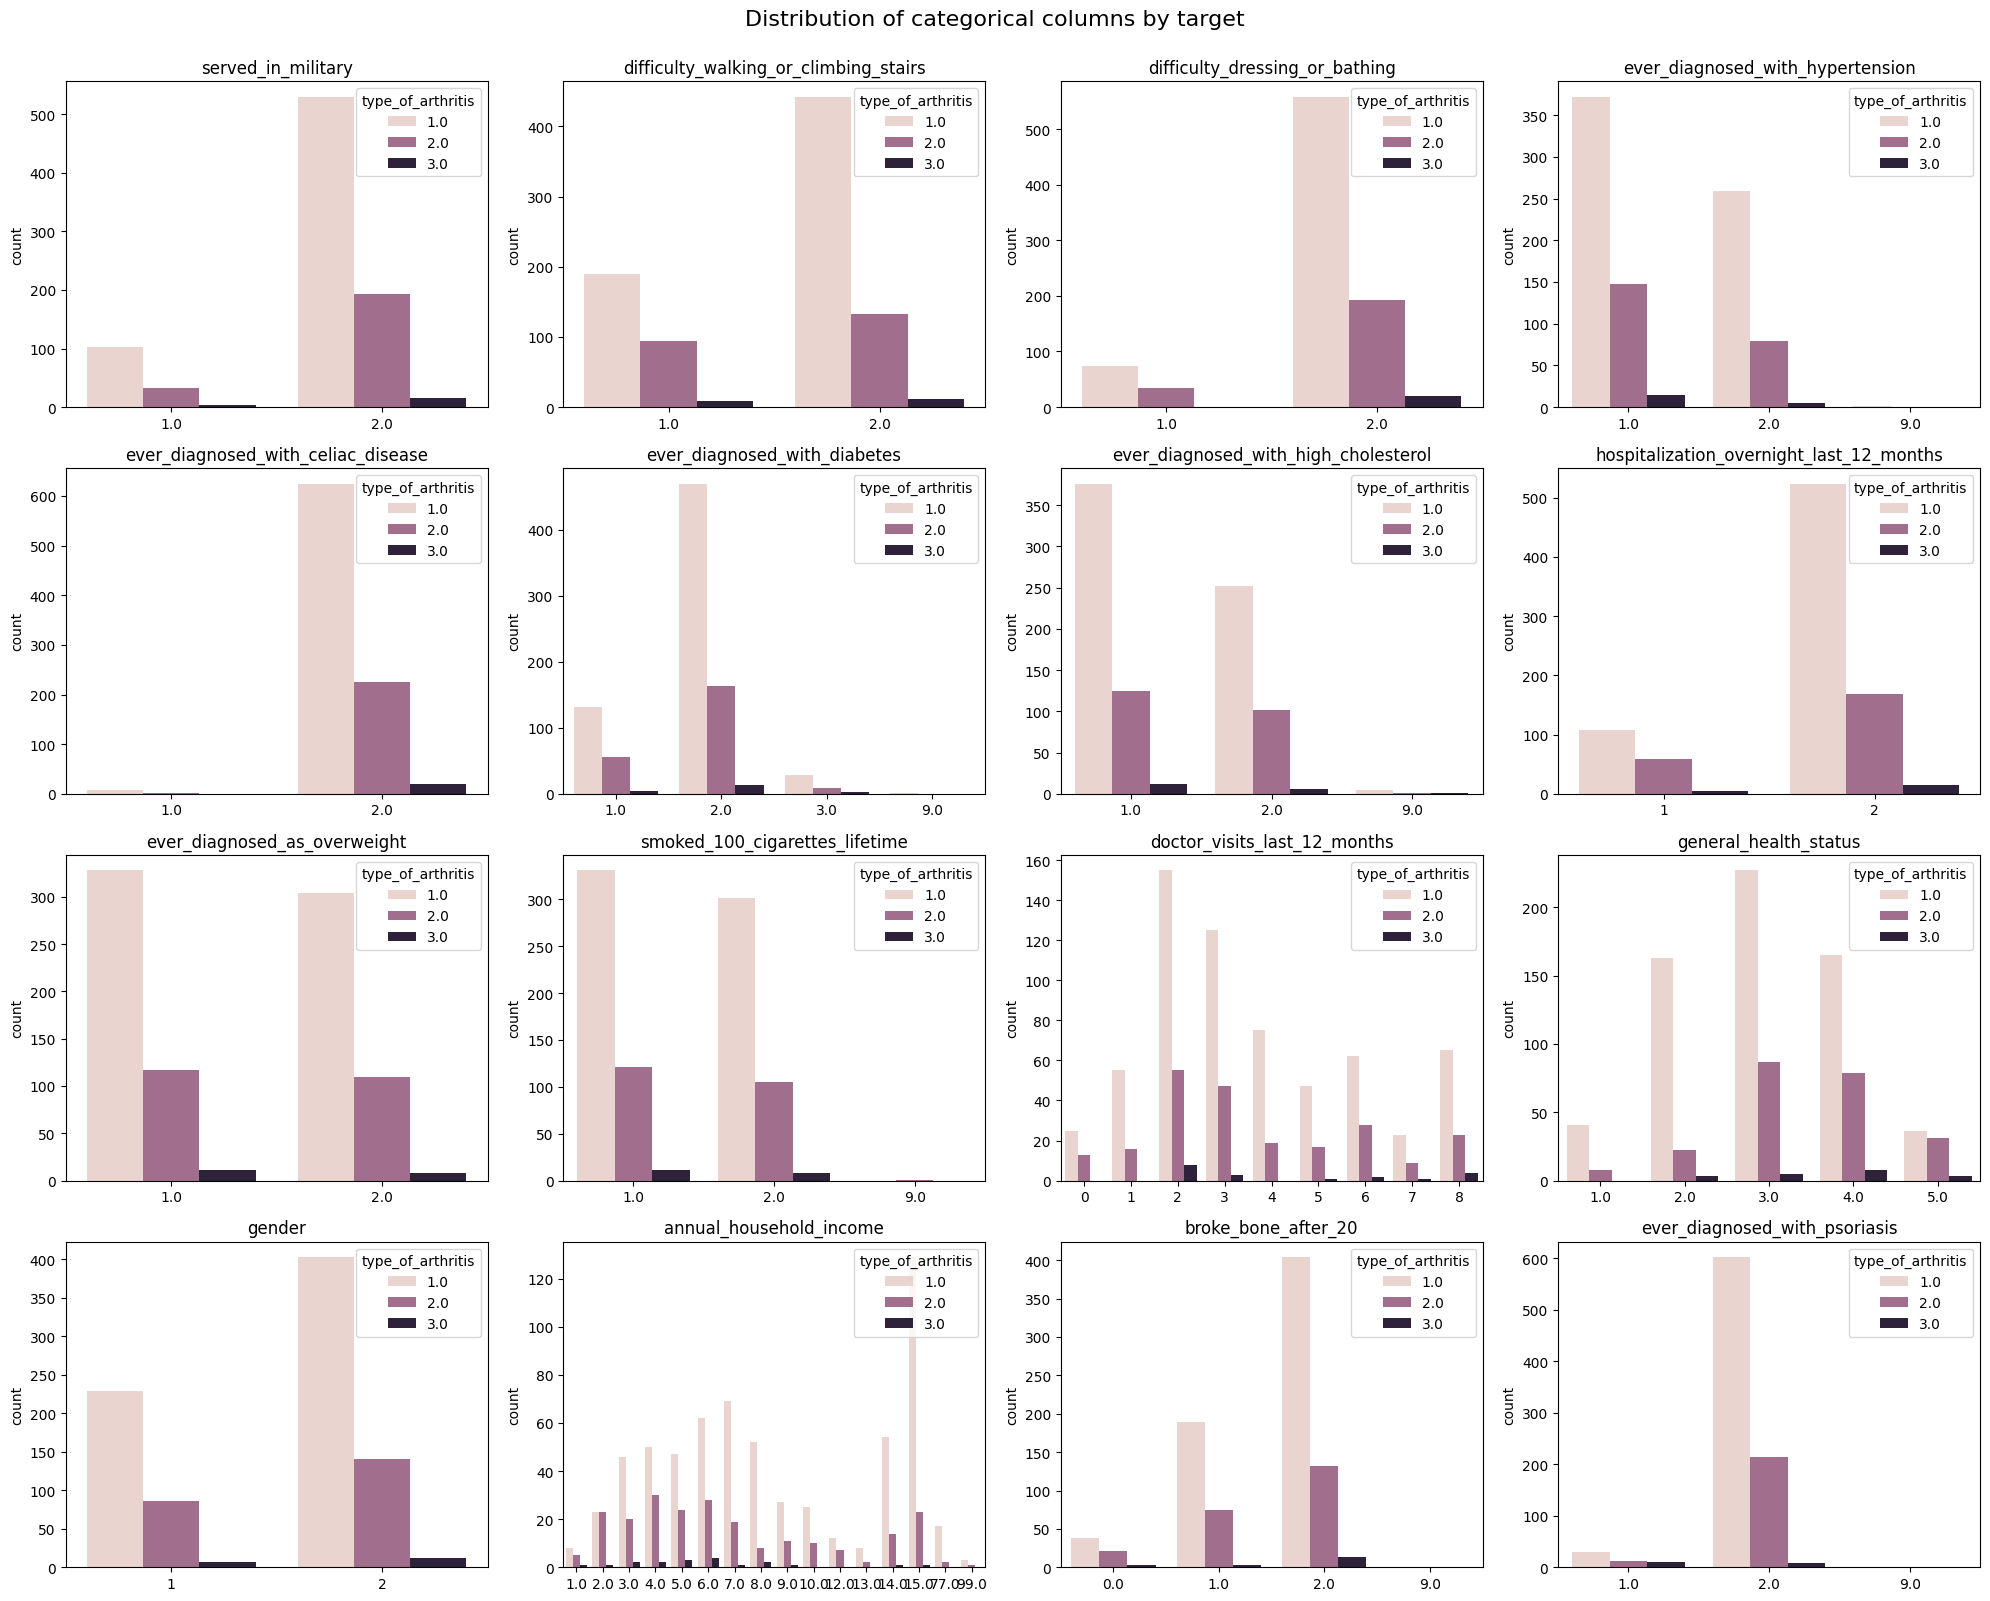

In [ ]:
def plot_categorical_distributions(df, target_col, cols, rows=5, cols_per_row=4):
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, 20))
    axes = axes.flatten()

    # Plot the distribution of each categorical column by the target column
    for i, col in enumerate(set(cols) - {target_col}):
        sns.countplot(data=df, x=col, hue=target_col, ax=axes[i])
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].legend(title=target_col, loc='upper right')

    # Remove any empty subplots if there are fewer columns than grid spaces
    for j in range(i + 1, rows * cols_per_row):
        fig.delaxes(axes[j])

    # Set the super title
    fig.suptitle('Distribution of categorical columns by target', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    # plt.tight_layout()
    plt.show()

# Plot the distributions
plot_categorical_distributions(df, 'type_of_arthritis', categorical_columns)

This code performs the following steps to handle categorical variables in a DataFrame:

In [91]:
# Convert non-continuous columns to category dtype
df[categorical_columns] = df[categorical_columns].astype('category')

# Handle type_of_arthritis separately to avoid dropping the first category
type_of_arthritis_dummies = pd.get_dummies(df['type_of_arthritis'], prefix='type_of_arthritis', drop_first=False)

# Create dummy variables for other categorical columns with drop_first=True
other_categorical_columns = [col for col in categorical_columns if col != 'type_of_arthritis']
df_dummies = pd.get_dummies(df[other_categorical_columns], prefix_sep='_', drop_first=True)

# Drop original categorical columns from the DataFrame
df = df.drop(columns=categorical_columns)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, df_dummies, type_of_arthritis_dummies], axis=1)

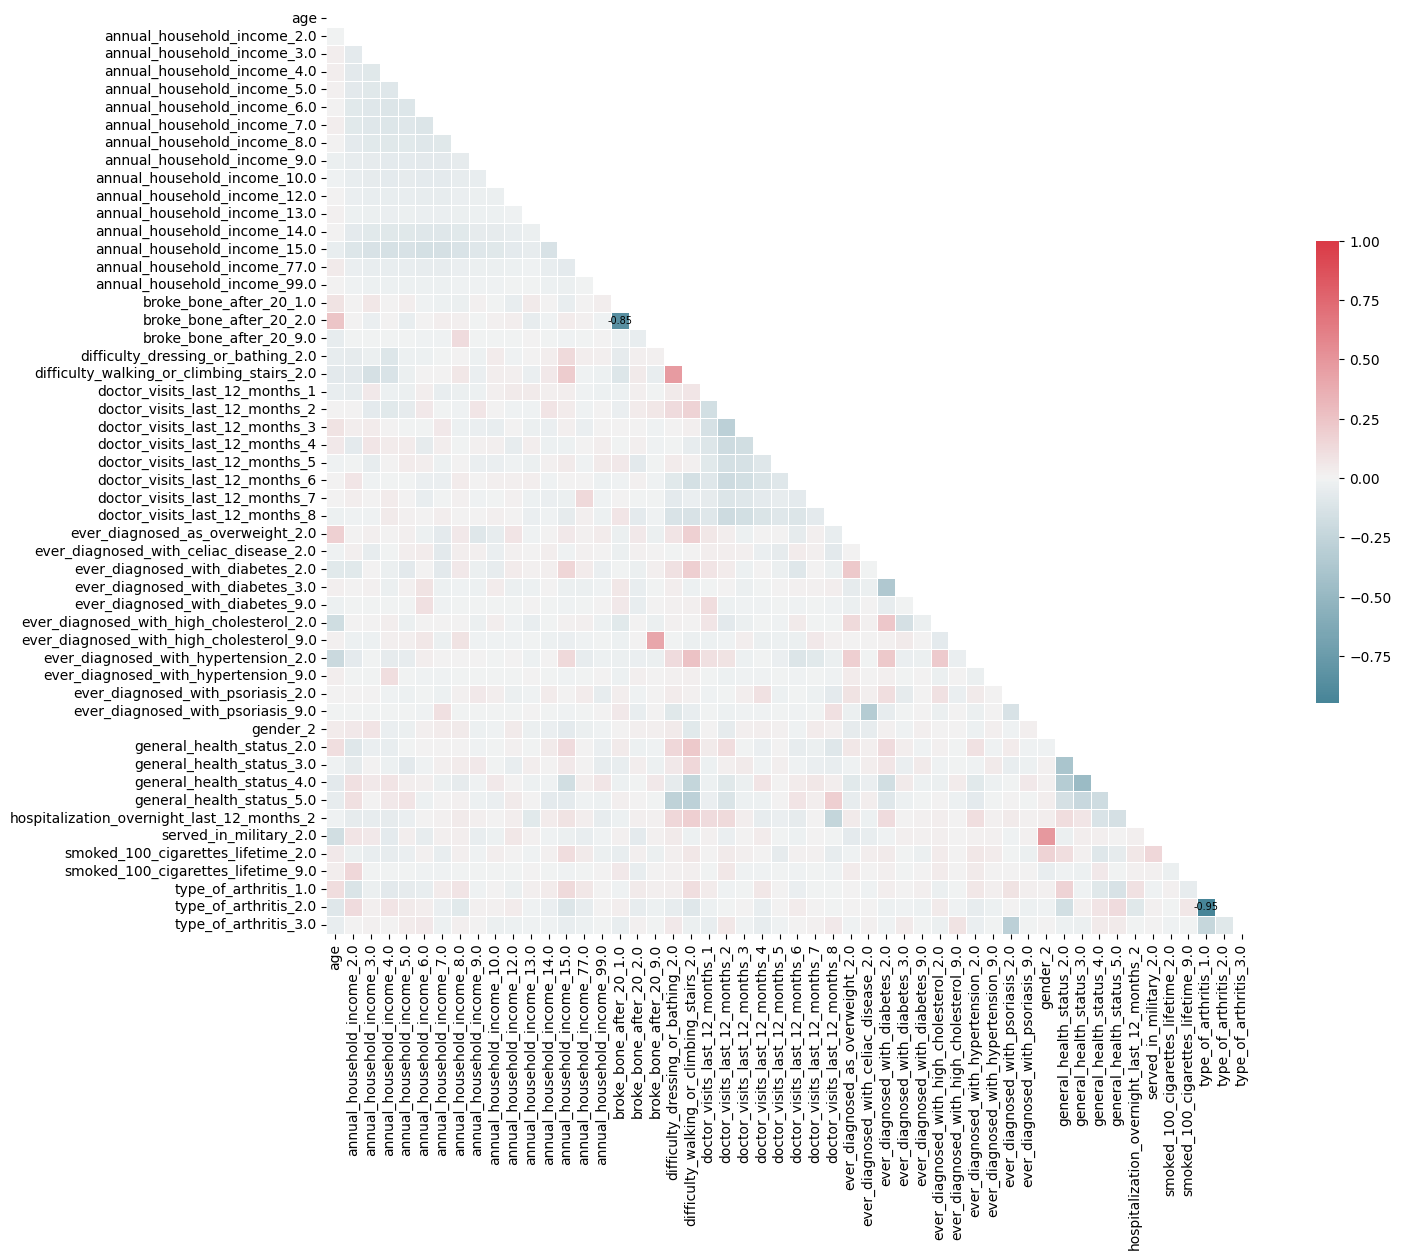

In [92]:
# Calculate corr
corr = df.corr()
# Mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
plt.figure(figsize=(17, 12))

# Create an annotation matrix with conditions for values above 0.8 or below -0.8
annot = corr.applymap(lambda x: f"{x:.2f}" if abs(x) >= 0.8 else "")

# Draw the heatmap with the mask, annotations, and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=annot, fmt="", annot_kws={"size": 7, "color": "black"})

plt.show()

In [93]:
targets = [col for col in df.columns if 'type_of_arthritis' in col]


==================== Logistic Regression ====================
Training Logistic Regression...
Accuracy: 0.5341
Classification Report:
                       precision    recall  f1-score   support

type_of_arthritis_1.0       0.78      0.57      0.66       128
type_of_arthritis_2.0       0.32      0.43      0.36        47
type_of_arthritis_3.0       0.05      1.00      0.10         1

             accuracy                           0.53       176
            macro avg       0.38      0.67      0.37       176
         weighted avg       0.65      0.53      0.58       176



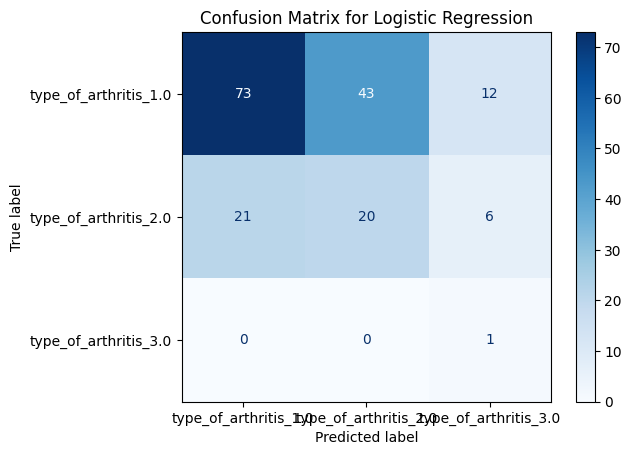


==================== Random Forest ====================
Training Random Forest...
Accuracy: 0.6591
Classification Report:
                       precision    recall  f1-score   support

type_of_arthritis_1.0       0.72      0.87      0.79       128
type_of_arthritis_2.0       0.23      0.11      0.14        47
type_of_arthritis_3.0       0.00      0.00      0.00         1

             accuracy                           0.66       176
            macro avg       0.32      0.32      0.31       176
         weighted avg       0.58      0.66      0.61       176



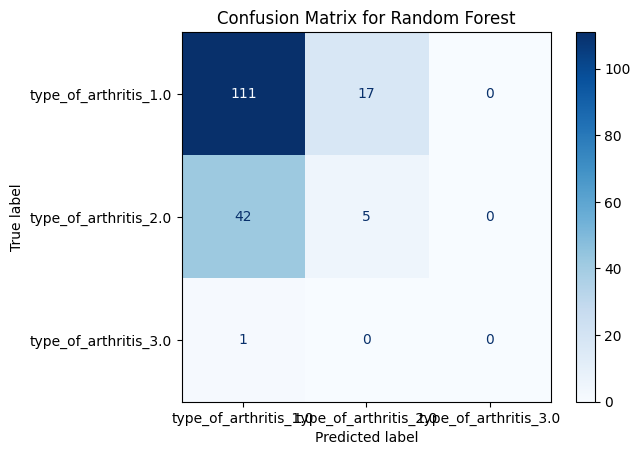


==================== XGBoost ====================
Training XGBoost...
Accuracy: 0.6761
Classification Report:
                       precision    recall  f1-score   support

type_of_arthritis_1.0       0.75      0.83      0.79       128
type_of_arthritis_2.0       0.35      0.26      0.30        47
type_of_arthritis_3.0       1.00      1.00      1.00         1

             accuracy                           0.68       176
            macro avg       0.70      0.69      0.69       176
         weighted avg       0.65      0.68      0.66       176



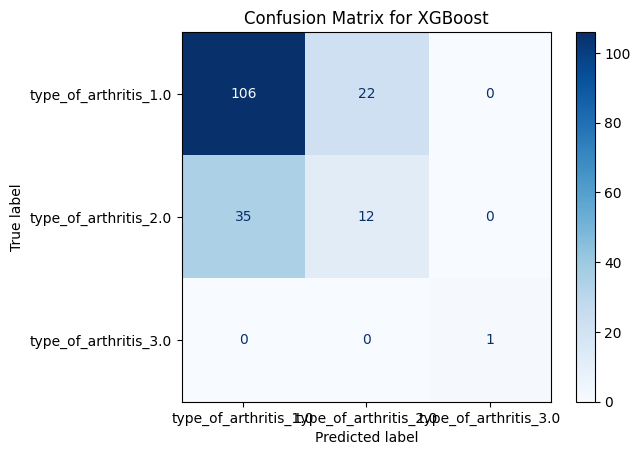


==================== ANN ====================
Training ANN...
Accuracy: 0.6648
Classification Report:
                       precision    recall  f1-score   support

type_of_arthritis_1.0       0.77      0.80      0.78       128
type_of_arthritis_2.0       0.37      0.30      0.33        47
type_of_arthritis_3.0       0.20      1.00      0.33         1

             accuracy                           0.66       176
            macro avg       0.45      0.70      0.48       176
         weighted avg       0.66      0.66      0.66       176



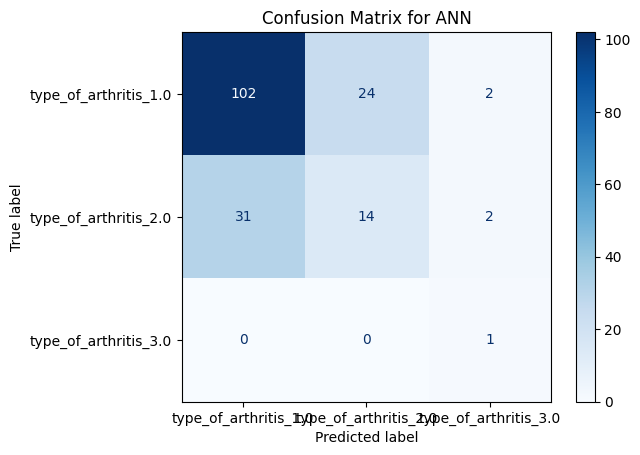


Feature Importances for Random Forest:
ever_diagnosed_with_psoriasis_2.0: 0.1316
age: 0.0709
doctor_visits_last_12_months_2: 0.0452
ever_diagnosed_with_hypertension_2.0: 0.0376
general_health_status_4.0: 0.0374
general_health_status_2.0: 0.0370
ever_diagnosed_as_overweight_2.0: 0.0347
difficulty_walking_or_climbing_stairs_2.0: 0.0329
gender_2: 0.0318
doctor_visits_last_12_months_8: 0.0315

Feature Importances for XGBoost:
ever_diagnosed_with_psoriasis_2.0: 0.2626
general_health_status_2.0: 0.0902
doctor_visits_last_12_months_2: 0.0571
annual_household_income_6.0: 0.0327
annual_household_income_3.0: 0.0302
annual_household_income_2.0: 0.0282
annual_household_income_9.0: 0.0253
annual_household_income_15.0: 0.0226
annual_household_income_5.0: 0.0224
gender_2: 0.0213

Summary of Model Performance:
Logistic Regression Accuracy: 0.5341
Random Forest Accuracy: 0.6591
XGBoost Accuracy: 0.6761
ANN Accuracy: 0.6648


In [94]:
# 1. Data Preparation
# ---------------------
# Define features and target variable
X = df.drop(columns=targets)
y = df[targets].idxmax(axis=1)

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

# 2. Model Pipeline Setup
# -------------------------
# Preprocessing for numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_columns),
        # If categorical data needs preprocessing, add the categorical transformer here
        # Example: ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'  # Leave other columns (if any) untouched
)

# Update pipelines to include the ColumnTransformer
models = {
    'Logistic Regression': ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=RANDOM_STATE)),
        ('classifier', LogisticRegression(multi_class='ovr', max_iter=1000, random_state=RANDOM_STATE))
    ]),
    'Random Forest': ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=RANDOM_STATE)),
        ('classifier', RandomForestClassifier(random_state=RANDOM_STATE))
    ]),
    'XGBoost': ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=RANDOM_STATE)),
        ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE))
    ]),
    'ANN': ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=RANDOM_STATE)),
        ('classifier', MLPClassifier(
            hidden_layer_sizes=(100,),  # One hidden layer with 100 neurons
            activation='relu',          # Activation function
            solver='adam',              # Optimizer
            max_iter=300,               # Number of iterations
            random_state=RANDOM_STATE   # Random seed for reproducibility
        ))
    ])
}

# 3. Training and Evaluation
# ----------------------------
# Train and evaluate each model
for model_name, pipeline in models.items():
    print(f"\n{'='*20} {model_name} {'='*20}")
    
    # Training the model
    print(f"Training {model_name}...")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    
    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# 4. Feature Importance for Tree-based Models
# ---------------------------------------------
# Display feature importances for Random Forest, Gradient Boosting, and XGBoost models
for model_name, pipeline in models.items():
    if model_name in ['Random Forest', 'Gradient Boosting', 'XGBoost']:
        classifier = pipeline.named_steps['classifier']
        print(f"\nFeature Importances for {model_name}:")
        importances = classifier.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        # Display top 10 features for better interpretation
        for i in indices[:10]:
            print(f"{X.columns[i]}: {importances[i]:.4f}")

# Final Summary
# --------------
print("\nSummary of Model Performance:")
for model_name, pipeline in models.items():
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")


## **Main Research Question:** To what extent can Machine Learning be used to predict the type of arthritis among adults in the NHANES population?

#### Sub Questions:
- What significant associations exist between demographic characteristics, ... and arthritis types among adults in the NHANES dataset?
- Which features are most influential in predicting arthritis types, and how does feature selection impact model performance?
- Among various classification models and evaluation metrics, which combination yields the best performance in predicting arthritis types?